In [117]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np

# For visualisation 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Dependencies for preprocessing data for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

# Dependencies for nueural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Dependencies for SVR model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# # imports for database connection
# import sqlalchemy
# from sqlalchemy.ext.automap import automap_base
# from sqlalchemy import create_engine, func

# # import these to view table column headers & rows
# from sqlalchemy.orm import sessionmaker
# from sqlalchemy import select


In [118]:
# load in the files
file = Path("../Resources/StringencyColumns.csv")

# read the files
df= pd.read_csv(file)


In [119]:
# Check StringencyColumns.csv
print(df.dtypes)


Unnamed: 0                                int64
date                                     object
iso_code                                 object
C1_School closing                       float64
C1_Flag                                 float64
C2_Workplace closing                    float64
C2_Flag                                 float64
C3_Cancel public events                 float64
C3_Flag                                 float64
C4_Restrictions on gatherings           float64
C4_Flag                                 float64
C5_Close public transport               float64
C5_Flag                                 float64
C6_Stay at home requirements            float64
C6_Flag                                 float64
C7_Restrictions on internal movement    float64
C7_Flag                                 float64
C8_International travel controls        float64
H1_Public information campaigns         float64
H1_Flag                                 float64
total_cases                             

In [120]:
df.columns

Index(['Unnamed: 0', 'date', 'iso_code', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'H1_Public information campaigns',
       'H1_Flag', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths'],
      dtype='object')

In [121]:
# Encode the date column to int
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'])
print(df.dtypes)


Unnamed: 0                                int64
date                                      int32
iso_code                                 object
C1_School closing                       float64
C1_Flag                                 float64
C2_Workplace closing                    float64
C2_Flag                                 float64
C3_Cancel public events                 float64
C3_Flag                                 float64
C4_Restrictions on gatherings           float64
C4_Flag                                 float64
C5_Close public transport               float64
C5_Flag                                 float64
C6_Stay at home requirements            float64
C6_Flag                                 float64
C7_Restrictions on internal movement    float64
C7_Flag                                 float64
C8_International travel controls        float64
H1_Public information campaigns         float64
H1_Flag                                 float64
total_cases                             

In [122]:
df=df[['date', 'iso_code', 'C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings',
       'C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]

df

,date,iso_code,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,total_cases,total_deaths,new_cases,new_deaths
0,72,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
1,78,ABW,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0
2,79,ABW,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,0.0,2.0,0.0
3,80,ABW,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0,0.0,0.0,0.0
4,81,ABW,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48523,239,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6251.0,179.0,55.0,13.0
48524,240,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6292.0,189.0,41.0,10.0
48525,241,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6388.0,195.0,96.0,6.0
48526,242,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6406.0,196.0,18.0,1.0


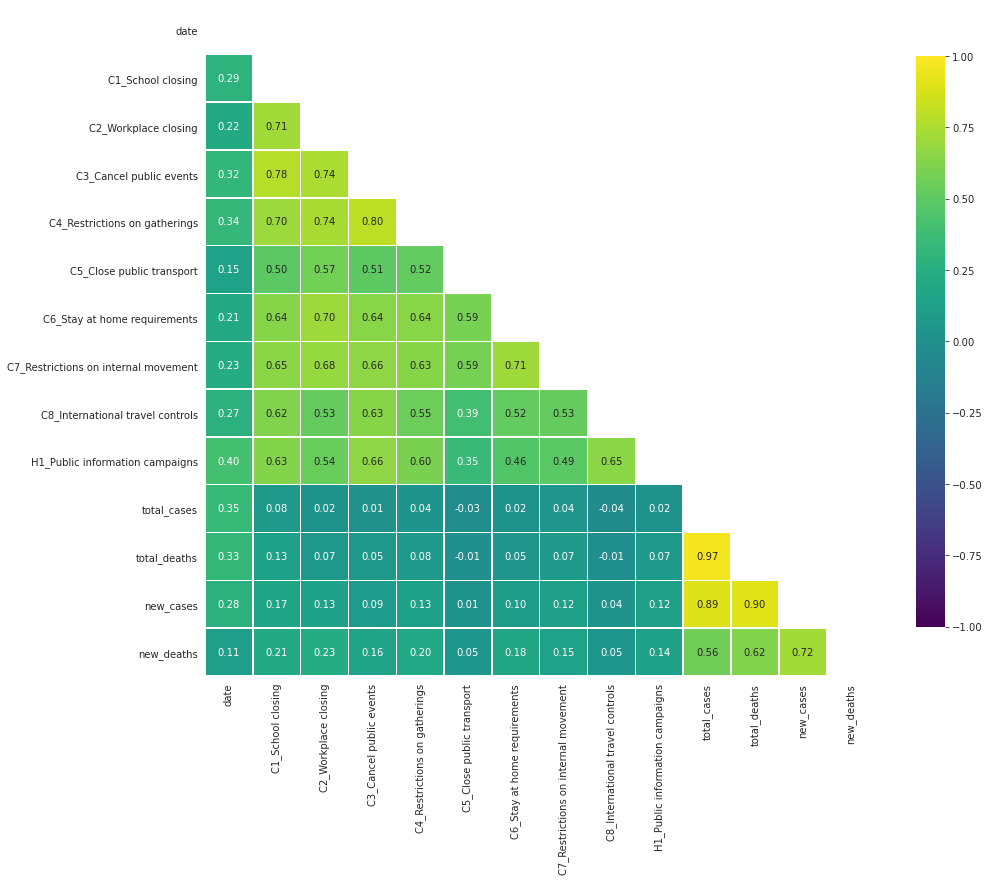

In [123]:
# Checking correlation for feature selection.

def correlation_heatmap(df):
    correlations = df.corr()
    mask = np.zeros_like(correlations)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):

        fig, ax = plt.subplots(figsize=(15,15))
        sns.heatmap(correlations,cmap='viridis', mask=mask,vmin=-1.0,vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

# DF Total Death

In [124]:
# Create a df to test impact of some features on 'total deaths'
df_td=df[['C1_School closing',
       'C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport',
       'C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls', 
        'H1_Public information campaigns','total_deaths']]

df_td.head()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,total_deaths
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
3,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0
4,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0


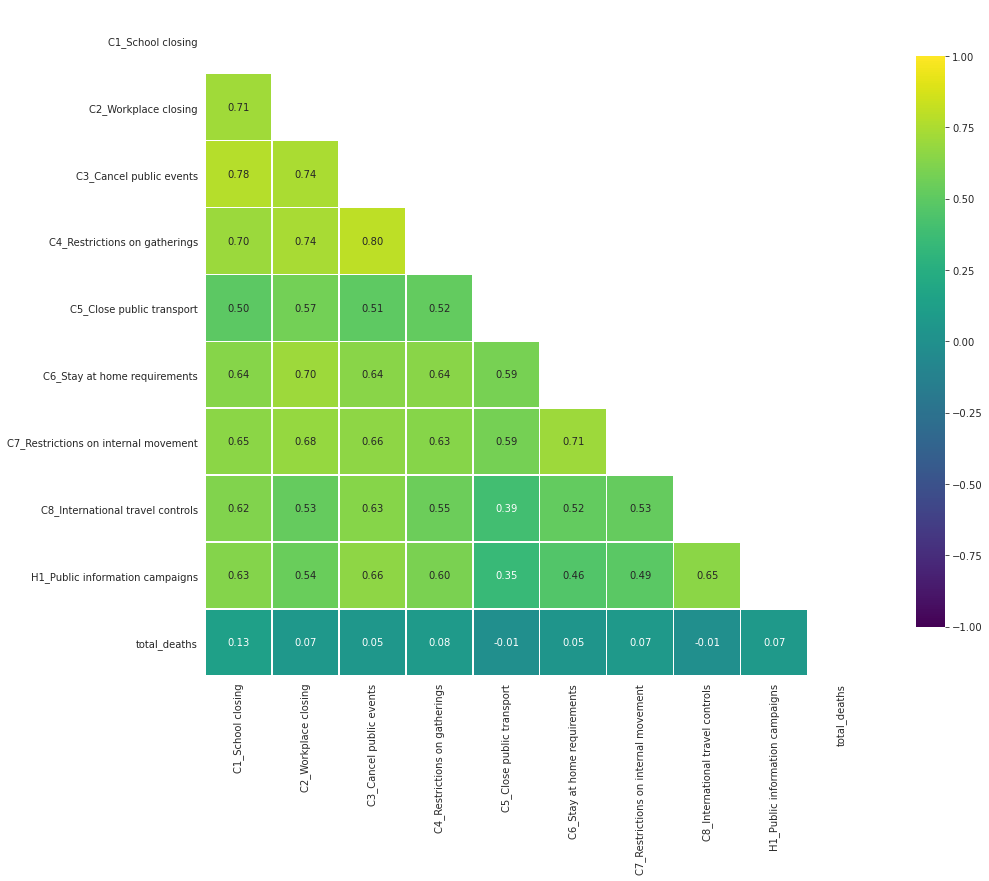

In [125]:
correlation_heatmap(df_td)


In [126]:
df_td.dtypes

C1_School closing                       float64
C2_Workplace closing                    float64
C3_Cancel public events                 float64
C4_Restrictions on gatherings           float64
C5_Close public transport               float64
C6_Stay at home requirements            float64
C7_Restrictions on internal movement    float64
C8_International travel controls        float64
H1_Public information campaigns         float64
total_deaths                            float64
dtype: object

# RandomForestRegressor


In [127]:
# create features(X) and target(y) sets
X = df_td.drop(['total_deaths'],axis=1).values

y = df_td['total_deaths'].values
y = y.reshape(-1,1)

In [128]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.31368 and the r2_score is:0.664
------------------------------------
Feature: 0, Score: 0.08868
Feature: 1, Score: 0.05546
Feature: 2, Score: 0.08275
Feature: 3, Score: 0.07002
Feature: 4, Score: 0.04483
Feature: 5, Score: 0.09024
Feature: 6, Score: 0.17206
Feature: 7, Score: 0.38469
Feature: 8, Score: 0.01126
--------------------------------------


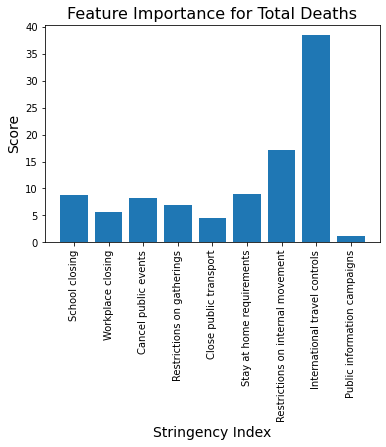

In [153]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =[ 'School closing',
       'Workplace closing','Cancel public events','Restrictions on gatherings','Close public transport',
       'Stay at home requirements','Restrictions on internal movement','International travel controls', 
        'Public information campaigns']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Stringency Index', size=14)
plt.title('Feature Importance for Total Deaths', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_td.png', bbox_inches='tight')
plt.show()

In [130]:
importance*100

array([ 7.68904915, 12.3379931 ,  4.60047411,  6.66376076,  4.91813152,
       15.38215999, 24.36615045, 22.39099906,  1.65128186])

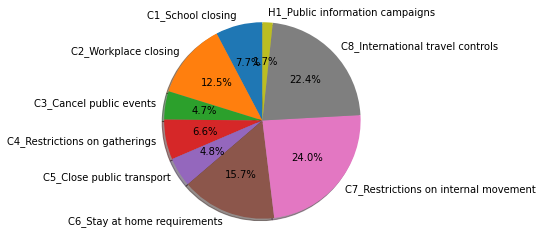

In [131]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =[ 'C1_School closing',
       'C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport',
       'C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls', 
        'H1_Public information campaigns']

sizes = [7.7120631 , 12.4870191 ,  4.65656932,  6.58067871,  4.83700802,
       15.65338247, 23.95355105, 22.42831538,  1.69141285]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Total cases Df

In [132]:
# Create a df to test impact of some features on 'total cases'
df_tc=df[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings',
          'C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement',
          'C8_International travel controls','H1_Public information campaigns','total_cases']]
df_tc.head()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,total_cases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0
3,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0
4,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0


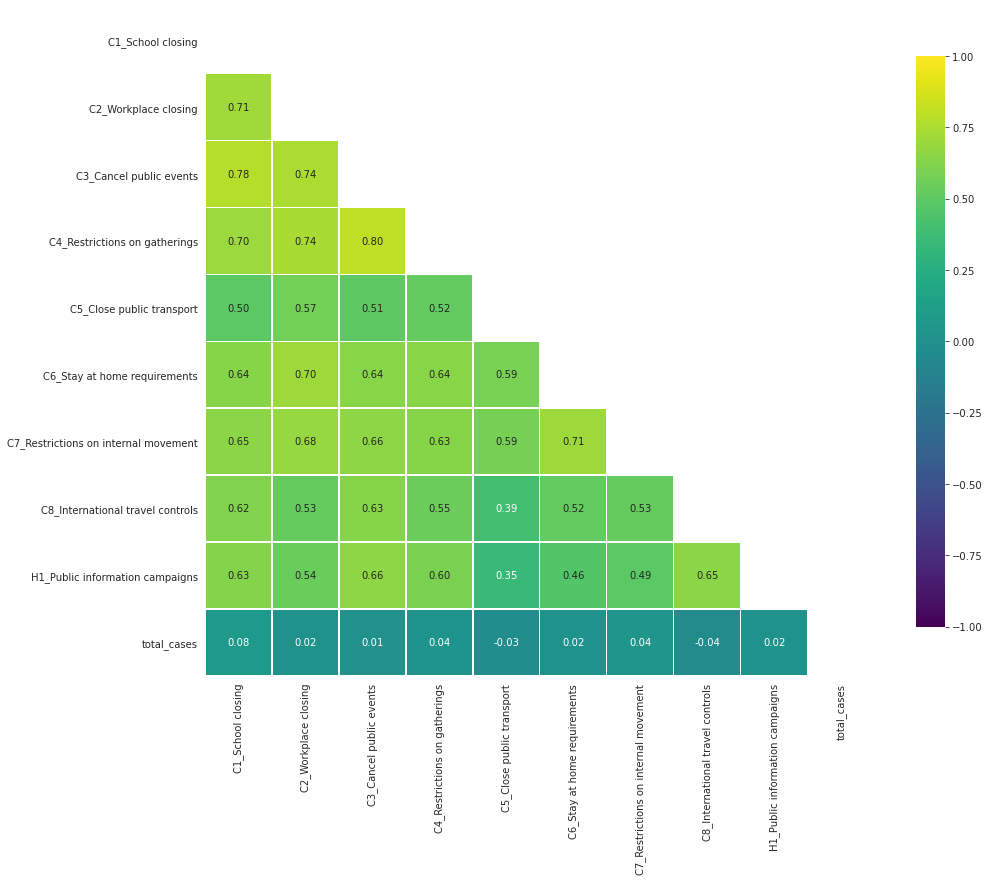

In [133]:
correlation_heatmap(df_tc)

# RandomForestRegressor


In [134]:
# create features(X) and target(y) sets
X = df_tc.drop(['total_cases'],axis=1).values

y = df_tc['total_cases'].values
y = y.reshape(-1,1)

In [135]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.31381 and the r2_score is:0.663
------------------------------------
Feature: 0, Score: 0.08658
Feature: 1, Score: 0.05711
Feature: 2, Score: 0.08235
Feature: 3, Score: 0.07021
Feature: 4, Score: 0.04501
Feature: 5, Score: 0.09142
Feature: 6, Score: 0.17147
Feature: 7, Score: 0.38463
Feature: 8, Score: 0.01122
--------------------------------------


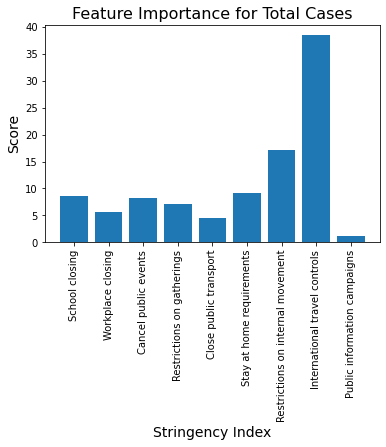

In [150]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =['School closing','Workplace closing','Cancel public events','Restrictions on gatherings',
          'Close public transport','Stay at home requirements','Restrictions on internal movement',
          'International travel controls','Public information campaigns']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Stringency Index', size=14)
plt.title('Feature Importance for Total Cases', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_tc.png', bbox_inches='tight')
plt.show()

In [137]:
importance*100

array([ 8.7313511 , 11.89921437,  6.97904489,  7.38682223,  5.48832567,
       15.24728207, 19.68326193, 21.37421192,  3.2104858 ])

# Df New Deaths

In [138]:
# Create a df to test impact of some features on 'new deaths'
df_nd=df[['C1_School closing',
       'C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport',
       'C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls', 
        'H1_Public information campaigns','new_deaths']]

df_nd.head()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,new_deaths
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
3,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0
4,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0


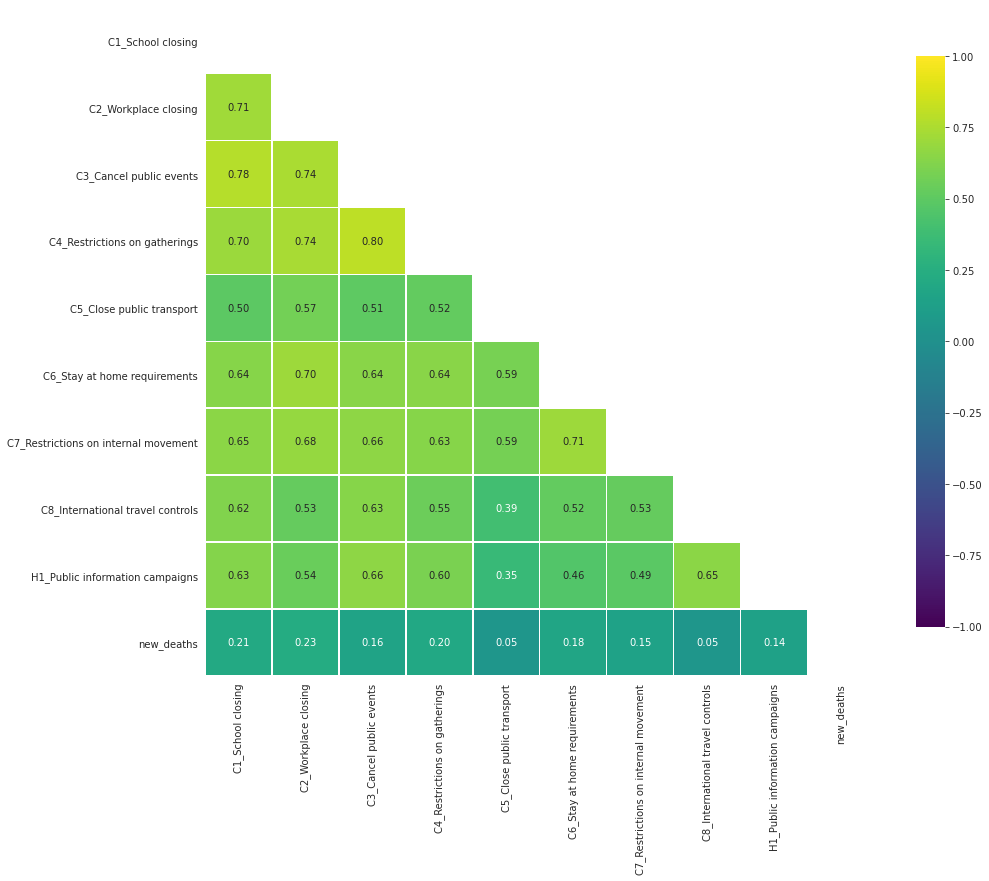

In [139]:
correlation_heatmap(df_nd)


# RandomForestRegressor


In [140]:
# create features(X) and target(y) sets
X = df_nd.drop(['new_deaths'],axis=1).values

y = df_nd['new_deaths'].values
y = y.reshape(-1,1)

In [141]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.31368 and the r2_score is:0.664
------------------------------------
Feature: 0, Score: 0.08866
Feature: 1, Score: 0.05666
Feature: 2, Score: 0.08181
Feature: 3, Score: 0.07000
Feature: 4, Score: 0.04551
Feature: 5, Score: 0.09044
Feature: 6, Score: 0.17146
Feature: 7, Score: 0.38418
Feature: 8, Score: 0.01128
--------------------------------------


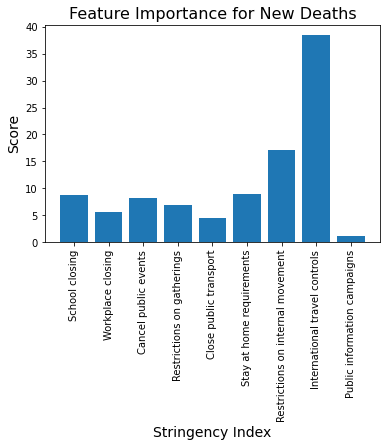

In [151]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =[ 'School closing',
       'Workplace closing','Cancel public events','Restrictions on gatherings','Close public transport',
       'Stay at home requirements','Restrictions on internal movement','International travel controls', 
        'Public information campaigns']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Stringency Index', size=14)
plt.title('Feature Importance for New Deaths', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_nd.png', bbox_inches='tight')
plt.show()

In [143]:
importance*100

array([ 5.51577508,  5.66865292,  1.83134503,  5.9993382 ,  5.81044207,
       14.07492383, 18.11157881, 42.14596778,  0.84197628])

# Df New Cases

In [144]:
# Create a df to test impact of some features on 'total deaths'
df_nc=df[['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings',
          'C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement',
          'C8_International travel controls','H1_Public information campaigns','new_cases']]
df_nc.head()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,new_cases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0
3,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0
4,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0


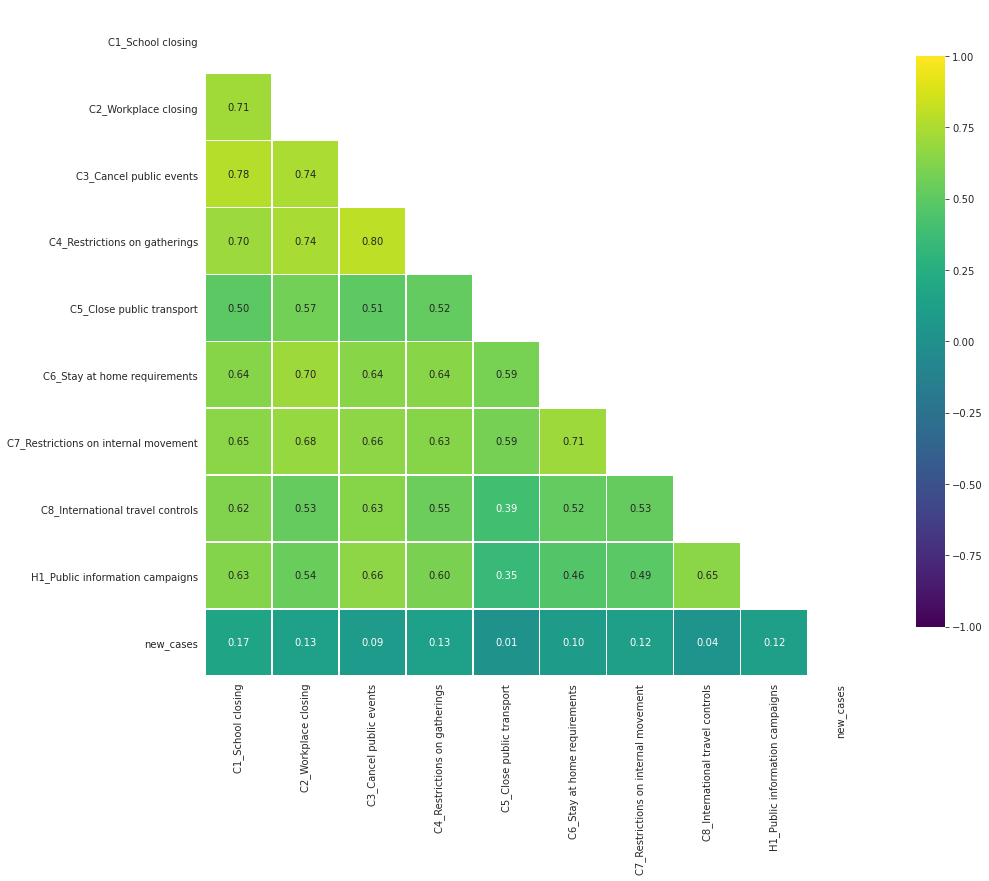

In [145]:
correlation_heatmap(df_nc)

# RandomForestRegressor


In [146]:
# create features(X) and target(y) sets
X = df_nc.drop(['new_cases'],axis=1).values

y = df_nc['new_cases'].values
y = y.reshape(-1,1)

In [147]:
# Split dataset into training and testing
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

y_scaler= StandardScaler()
y_scaler.fit(y_train)

y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 the mean_squared error is :0.31395 and the r2_score is:0.663
------------------------------------
Feature: 0, Score: 0.08766
Feature: 1, Score: 0.05605
Feature: 2, Score: 0.08097
Feature: 3, Score: 0.07036
Feature: 4, Score: 0.04602
Feature: 5, Score: 0.09168
Feature: 6, Score: 0.17291
Feature: 7, Score: 0.38322
Feature: 8, Score: 0.01113
--------------------------------------


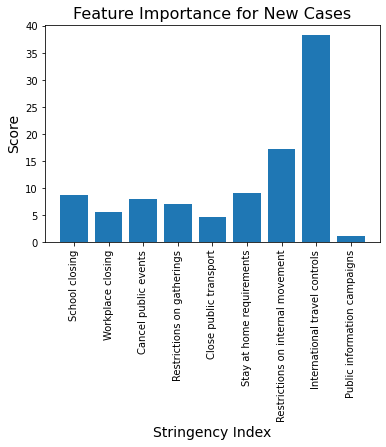

In [152]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_scaled)

# predict y
y_pred=model.predict(X_test_scaled)
# print(y_pred)

# calculate mean square error
mse=mean_squared_error(y_test_scaled,y_pred)

# calculate r2 score
r2=r2_score(y_test_scaled, y_pred)

print(f' the mean_squared error is :{mse:.5f} and the r2_score is:{r2:.3f}')

print('------------------------------------')

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
    
print('--------------------------------------')

# plot feature importance
labels =[ 'School closing',
       'Workplace closing','Cancel public events','Restrictions on gatherings','Close public transport',
       'Stay at home requirements','Restrictions on internal movement','International travel controls', 
        'Public information campaigns']

plt.bar([x for x in range(len(importance))], importance*100)
plt.xticks(range(len(importance)),labels, rotation=90, size=10)
plt.ylabel('Score', size=14)
plt.xlabel('Stringency Index', size=14)
plt.title('Feature Importance for New Cases', size=16)
plt.savefig('../Analysis/plotly charts/images/Feature_imp_nc.png', bbox_inches='tight')
plt.show()

In [149]:
importance*100

array([ 8.83228962,  5.6330173 ,  8.3011182 ,  6.99542765,  4.66231438,
        8.87135238, 17.19912111, 38.38418108,  1.12117828])